In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [4]:
UserTweets = pd.read_csv("/home/is/shuntaro-o/dev/persons_move_analysis/data/202210_1month_per_hour.csv")
UserPlase = pd.read_csv('/home/is/shuntaro-o/dev/disaster_analysis_Twitter/data/TweetPlaces_Japan7Cities/FoursquareUserPlacesTokyo_20210419.txt', sep=',', lineterminator='\n', header=None,names = ['place_id', 'city_name', 'object', 'country', 'UserPlase_longitude', 'UserPlase_latitude', 'UserPlase_sub_longitude', 'UserPlase_sub_latitude'])

/tmp/ipykernel_13494/4222905244.py:1: DtypeWarning: Columns (6,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  UserTweets = pd.read_csv("/home/is/shuntaro-o/dev/persons_move_analysis/data/202210_1month_per_hour.csv")


In [5]:
UserPlase =UserPlase[~UserPlase.duplicated(subset='place_id')]
UserPlase = UserPlase.reset_index(drop=True)
UserTweets = UserTweets.reset_index(drop=True)
merged_Tweet_place = pd.merge(UserTweets , UserPlase, how='left', on = "place_id")
merged_Tweet_place = merged_Tweet_place.reset_index(drop=True)
merged_Tweet_place = merged_Tweet_place.dropna(subset=['UserPlase_latitude','UserPlase_longitude'])
def UTM_cal(lat,lon):
    p,a=divmod(lat*60,40)
    q,b=divmod(a,5)
    r,c=divmod(b*60,30)
    s,d=divmod(c,15)
    t,e=divmod(d,7.5)

    u=str(lon-100)[0:2]
    f=lon-int(u)-100
    v,g=divmod(f*60,7.5)
    w,h=divmod(g*60,45)
    x,i=divmod(h,22.5)
    y,j=divmod(i,11.25)

    m=(s*2)+(x+1)
    n=(t*2)+(y+1)
    p=int(p)
    u=int(u)
    q=int(q)
    v=int(v)
    r=int(r)
    w=int(w)
    m=int(m)
    n=int(n)

    ans=str(p)+str(u)+str(q)+str(v)
    ans=int(ans)
    return(ans)
code_list=[]
for index, r in merged_Tweet_place.iterrows():
    ans=UTM_cal(r.UserPlase_latitude,r.UserPlase_longitude)
    code_list.append(ans)
merged_Tweet_place = merged_Tweet_place.reset_index(drop=True)
code_list=pd.Series(code_list)
merged_Tweet_place=pd.concat([merged_Tweet_place,code_list],axis=1)
merged_Tweet_place=merged_Tweet_place.rename(columns={0: 'code_estimation'})

In [6]:
df_one_day = merged_Tweet_place

In [7]:
df_one_day["created_at"]=df_one_day["created_at"].astype(str)
created_time=df_one_day.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_one_day=pd.concat([df_one_day,creatid_at_day_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_day'})
df_one_day=pd.concat([df_one_day,creatid_at_hour_list],axis=1)
df_one_day=df_one_day.rename(columns={0: 'creatid_at_hour'})

In [8]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [9]:
df_one_day = df_one_day[df_one_day['creatid_at_day'].isin(day_list)]
df_one_day = df_one_day[df_one_day['creatid_at_hour'].isin(hour_list)]

In [10]:
df_one_day['created_at'] = pd.to_datetime(df_one_day['created_at'],format="%Y-%m-%d_%H:%M:%S")

In [11]:
df_one_day

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
0,0,@Xing98183279 それも良いけどロリデ行こうよ🏰👗🤴👸,2022-10-01 00:59:57,0.0,1.0,0.0,0,65b41c11aca77bdb,4843678447,kanako_tv,...,千葉 浦安市,city,日本,139.872407,35.616612,139.939631,35.672793,533936,01,00
1,1,@marie_tada 優良ドライバーさん🥇,2022-10-01 00:59:54,0.0,0.0,1.0,0,f1299e526e0cc34d,1312247388745023488,1gaAZHQButVBi2D,...,千葉 佐倉市,city,日本,140.126120,35.624589,140.301034,35.766545,534031,01,00
2,2,ここ最近ずっとネガティブとポジティブが戦ってて、やっとポジティブが勝ちもうした！拍手！,2022-10-01 00:59:53,0.0,0.0,0.0,0,77173905596af4ab,449521349,seritakn,...,東京 文京区,city,日本,139.717275,35.699474,139.772477,35.735929,533945,01,00
3,3,@azumiruu 有識者が教えてくれたらいいなぁw,2022-10-01 00:59:52,0.0,0.0,2.0,0,4c1c4868f96634ed,1060387314369683456,pIzV0hATvm8aKYG,...,東京 江東区,city,日本,139.771307,35.582057,139.849007,35.708066,533926,01,00
4,4,@Shin_Saunaaa ご無事で何よりです！おデート楽しんでください❤️‍🔥,2022-10-01 00:59:50,0.0,1.0,1.0,0,db215c78c59027e4,1573305402208686081,tosakuuuuun_jp,...,千葉 市川市,city,日本,139.885492,35.655568,139.976610,35.775796,533937,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69884,95,今日の #夕暮れ はなんとも心動かされる色合いだった。鉄塔もいい感じに撮れた / today...,2022-10-31 23:57:58,0.0,0.0,2.0,0.0,1ea0fd1a31366833,7199952.0,wakaski,...,神奈 横浜市 都筑区,city,日本,139.543097,35.507956,139.616102,35.566753,533924,31,23
69885,96,お台場 Tokyoに写真を投稿しましたhttps://t.co/GJcY9s06SY,2022-10-31 23:57:57,0.0,0.0,0.0,0.0,594fa6c6bc5b5ba9,110322291.0,paulsmith_,...,東京 港区,city,日本,139.708754,35.622973,139.782004,35.682605,533935,31,23
69886,97,@jilmariya おめでとうございます㊗️㊗️㊗️作品、必ず拝見します👀,2022-10-31 23:57:55,0.0,1.0,1.0,0.0,bcf7dca0cae1c2e6,1088408401.0,emo4488,...,神奈 横浜市 南区,city,日本,139.570896,35.406284,139.641197,35.441318,533904,31,23
69887,98,これにつきまして、俺のプロレスデビューの時、感極まる人いただろうか…🤣笑いしか起きなかった様...,2022-10-31 23:57:55,0.0,0.0,1.0,0.0,a398e1f1025abe37,814713932.0,kurapin2020,...,埼玉 春日部市,city,日本,139.707880,35.935390,139.832566,36.043504,533975,31,23


In [12]:
df_Tokyo_station = df_one_day[df_one_day['code_estimation']==533946]

In [13]:
df_Tokyo_station['created_at'] = pd.to_datetime(df_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")

/tmp/ipykernel_13494/6308272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tokyo_station['created_at'] = pd.to_datetime(df_Tokyo_station['created_at'],format="%Y-%m-%d_%H:%M:%S")


In [14]:
df_Tokyo_station = df_Tokyo_station.dropna(subset=['created_at'])

In [15]:
df_Tokyo_station 

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
11,11,@naomisugimoto13 ありがとうございます🙇‍♀️対面で60名近く企業の人事の方...,2022-10-01 00:59:43,0.0,0.0,1.0,0,f72cbd7b378a05fc,1572109023448793091,MameTamatsukuri,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,01,00
31,32,@kawaemi_photo ご自分の枠の外の「何か」って不可解ですよね。でもそこに可能性を...,2022-10-01 00:59:02,0.0,1.0,1.0,0,f72cbd7b378a05fc,1265137901387448321,eLiixFemrjAvrJR,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,01,00
62,63,@Dk725aNpscBwpEa やはり！。そうなんだ。不思議ですね～。,2022-10-01 00:58:16,0.0,0.0,3.0,0,f72cbd7b378a05fc,213583474,jim6900,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,01,00
100,2,@asamadetv 私は過去に何度か台湾に行った。台湾の台北はまるで日本の新宿みたいな街並...,2022-10-01 01:59:54,0.0,0.0,0.0,0,f72cbd7b378a05fc,1575888821857964033,ORxjZ6vUqm1bpfZ,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,01,01
101,3,( ´-` ).｡oO(ファクトチェックセンターなるものが立ち上がったそうだけど、バズってる...,2022-10-01 01:59:52,0.0,0.0,0.0,0,27b43920b8b63188,388462005,pupupupupupurun,...,東京 墨田区,city,日本,139.788729,35.686697,139.842361,35.743565,533946,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69805,13,多分交感神経と副交感神経のバランスなんだろうなぁ,2022-10-31 23:59:43,0.0,0.0,0.0,0.0,f72cbd7b378a05fc,1386452310205681664.0,udalele,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,31,23
69817,26,@I_am_cat_xxxluv ほんとだよね。なんか、もっとワクワクした頃もあったのに。,2022-10-31 23:59:35,0.0,1.0,1.0,0.0,32049a95db695cb8,1101818271609716736.0,tank_yushima,...,東京 台東区,city,日本,139.762233,35.694775,139.809743,35.731637,533946,31,23
69823,33,SVJ乗りたいねぇ,2022-10-31 23:59:26,0.0,0.0,1.0,0.0,f72cbd7b378a05fc,1040227655507824640.0,takamanbo35,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,31,23
69834,44,@zakklele ワイと渚でカラダンスの夏とか,2022-10-31 23:59:03,0.0,1.0,3.0,0.0,f72cbd7b378a05fc,1386452310205681664.0,udalele,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,31,23


In [16]:
day=24
day = int(day)
df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]

In [17]:
df_perday

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
51909,13,@qu3co そうよねぇ(*´ 艸｀)全然平気よね♬.*ﾟでも来月には帰って来てちょーだいʕ...,2022-10-24 00:59:30,0.0,1.0,1.0,0,f72cbd7b378a05fc,143611268,maechandayo,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,24,00
51945,50,犬の歯磨きとかブラッシングの時間が自分にとってとても大切,2022-10-24 00:57:49,0.0,0.0,0.0,0,32049a95db695cb8,1010920238928429057,str_8808,...,東京 台東区,city,日本,139.762233,35.694775,139.809743,35.731637,533946,24,00
51994,2,@itukapirosuke 拝見しました。爆笑しました。ありがとうございます😊,2022-10-24 01:59:47,0.0,0.0,0.0,0,27b43920b8b63188,1411872568227766273,koyama19551955,...,東京 墨田区,city,日本,139.788729,35.686697,139.842361,35.743565,533946,24,01
51996,4,ぶどう🍇 https://t.co/LuhqtT2o11,2022-10-24 01:59:29,0.0,0.0,3.0,0,f72cbd7b378a05fc,1062136236473692161,ugm3FYanXrkCXRh,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,24,01
52000,8,@torozasexxiii お疲れ様です,2022-10-24 01:59:16,0.0,0.0,1.0,0,27b43920b8b63188,1411872568227766273,koyama19551955,...,東京 墨田区,city,日本,139.788729,35.686697,139.842361,35.743565,533946,24,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54044,77,@gs1200ssmatsu もう何が何だか分かりませんwww一度読んでみます！,2022-10-24 22:58:44,0.0,1.0,2.0,0,27b43920b8b63188,108858670,JETCHOP,...,東京 墨田区,city,日本,139.788729,35.686697,139.842361,35.743565,533946,24,22
54051,84,@uttyeigyo @hito_aqua1126 @gogoponta7133 @viht...,2022-10-24 22:58:34,0.0,0.0,3.0,0,f72cbd7b378a05fc,1244500227534409728,mushitefu,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,24,22
54067,2,@M_01290922_GAL 詩はすごく良いと想うよ♥️歌唱力は教えて貰って❤️歌なんて上...,2022-10-24 23:59:55,1.0,2.0,1.0,0,32049a95db695cb8,154399485,joeyabuki56,...,東京 台東区,city,日本,139.762233,35.694775,139.809743,35.731637,533946,24,23
54105,40,@ttaichiro @kameidobutate2 ぜひぜひ！！！亀戸飲みしましょー！！日...,2022-10-24 23:59:00,0.0,0.0,2.0,0,27b43920b8b63188,1117632873966604289,kanegon319,...,東京 墨田区,city,日本,139.788729,35.686697,139.842361,35.743565,533946,24,23


In [18]:
hour = 16
hour = int(hour)
end_time = df_perday[(df_perday['created_at'].dt.hour==hour)].head(1)['created_at'].values
start_time = df_perday[(df_perday['created_at'].dt.hour==hour)].tail(1)['created_at'].values

In [19]:
df_perday[(df_perday['created_at'].dt.hour==16)]

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code_estimation,creatid_at_day,creatid_at_hour
53421,16,@fuubou36 がんばっペ‼️😅,2022-10-24 16:59:42,0.0,0.0,3.0,0,32049a95db695cb8,1238743397151600640,xxxfujiponxxx,...,東京 台東区,city,日本,139.762233,35.694775,139.809743,35.731637,533946,24,16
53423,18,@cun_moa 近況報告行きたかったよー笑,2022-10-24 16:59:42,0.0,1.0,0.0,0,f72cbd7b378a05fc,166963256,youchinmaru,...,東京 葛飾区,city,日本,139.813216,35.710674,139.894671,35.797245,533946,24,16


In [20]:
delta = int(end_time-start_time)*(10**(-9))
delta

0.0

In [21]:
list_tweet_range = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    list_tweet_range_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_per_day.append(delta)
    list_tweet_range.append(list_tweet_range_per_day)

In [22]:
list_tweets_count = []
for day in day_list:
    day = int(day)
    df_perday = df_Tokyo_station[(df_Tokyo_station['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_per_hour.append(0)
    list_tweets_count.append(list_tweets_count_per_hour)

In [23]:
list_tweet_range = np.array(list_tweet_range)
list_tweets_count = np.array(list_tweets_count)

In [24]:
estimate = list_tweets_count*(3600/list_tweet_range)

Text(69.0, 0.5, 'day')

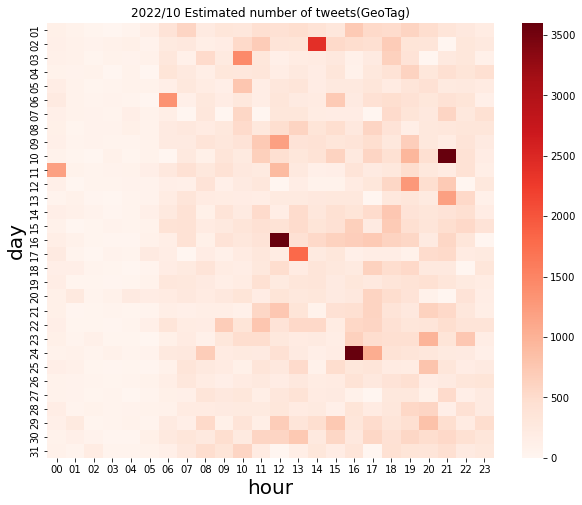

In [25]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate,xticklabels=hour_list, yticklabels=day_list, cmap="Reds")
heatmap.set_title('2022/10 Estimated number of tweets(GeoTag)')
heatmap.set_xlabel('hour',fontsize=20)
heatmap.set_ylabel('day',fontsize=20)